In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\Research Project\\Codes\\final_sentiment_data.csv')

In [3]:
data

datetime  sentiment_vader  positive_count  neutral_count  \
0      2021-01-01 00:00:00         0.583991        0.051003       0.009387   
1      2021-01-01 01:00:00         0.439338        0.089818       0.023956   
2      2021-01-01 02:00:00         0.431446        0.082880       0.028589   
3      2021-01-01 03:00:00         0.438948        0.063191       0.023286   
4      2021-01-01 04:00:00         0.537289        0.063004       0.015788   
...                    ...              ...             ...            ...   
13022  2022-06-29 20:00:00         0.336341        0.129571       0.040049   
13023  2022-06-29 21:00:00         0.344411        0.134446       0.041938   
13024  2022-06-29 22:00:00         0.297167        0.107257       0.032307   
13025  2022-06-29 23:00:00         0.318254        0.102944       0.029503   
13026  2022-06-30 00:00:00         0.172429        0.087755       0.028833   

       negative_count  ratio_positive  sentiment_polarization  net_sentiment  \
0            0.019069        0.261536                0.693206       0.127185   
1            0.060011        0.152605                0.534654       0.145570   
2            0.051318        0.167132                0.561453       0.143761   
3            0.035895        0.181112                0.585239       0.128692   
4            0.026921        0.241579                0.670205       0.138035   
...               ...             ...                     ...            ...   
13022        0.118620        0.096805                0.406105       0.146474   
13023        0.119742        0.101236                0.418140       0.153104   
13024        0.111329        0.078230                0.351264       0.118445   
13025        0.101234        0.086246                0.375850       0.122363   
13026        0.128716        0.036437                0.194365       0.068415   

       positive_to_total  negative_to_total     Close  Volume BTC  \
0               0.661794           0.348345  0.220092    0.052256   
1               0.561479           0.452509  0.228255    0.122131   
2               0.516816           0.388779  0.224018    0.053893   
3               0.508397           0.359251  0.225666    0.033032   
4               0.605647           0.339890  0.224523    0.046068   
...                  ...                ...       ...         ...   
13022           0.500967           0.546010  0.047517    0.080608   
13023           0.502561           0.533108  0.048920    0.032626   
13024           0.489889           0.602715  0.047312    0.132961   
13025           0.505134           0.588631  0.045529    0.046282   
13026           0.430784           0.741067  0.043855    0.053937   

       Volume USDT  trade_count  
0         0.044087     0.073059  
1         0.104564     0.129999  
2         0.046117     0.072129  
3         0.028235     0.053190  
4         0.039364     0.069336  
...            ...          ...  
13022     0.047756     0.073781  
13023     0.019335     0.038667  
13024     0.078531     0.117649  
13025     0.027196     0.041445  
13026     0.031649     0.050326  

[13027 rows x 14 columns]

In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Histogram

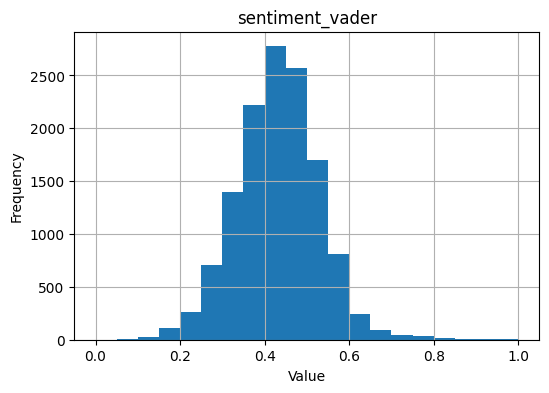

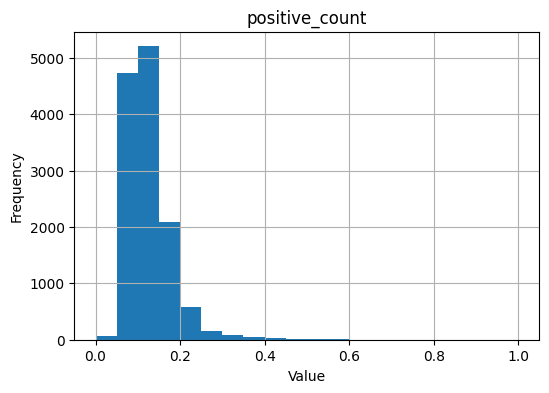

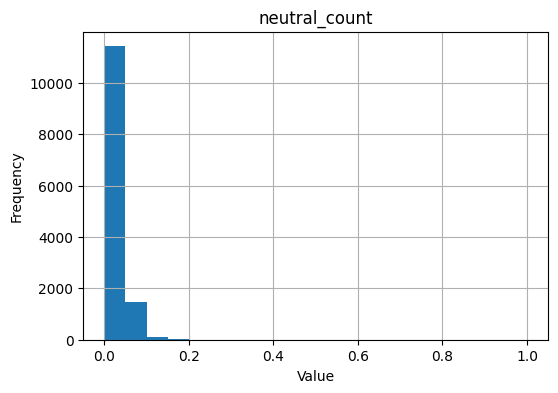

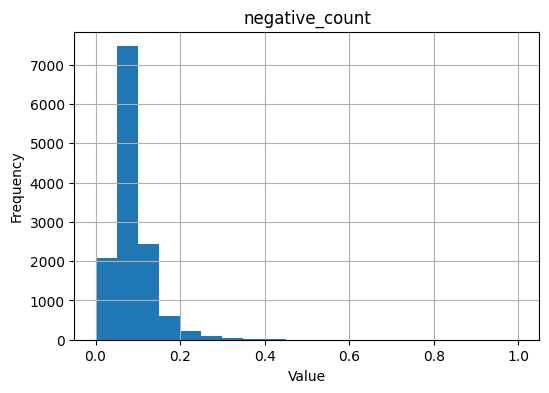

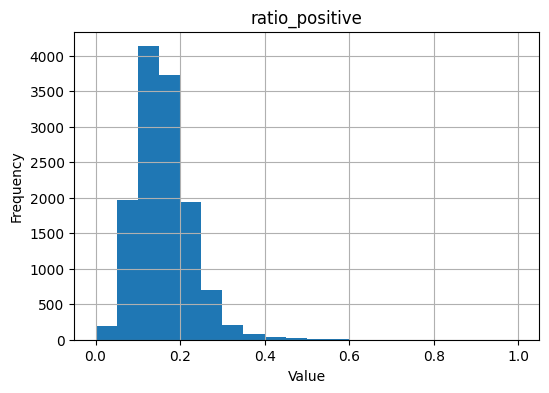

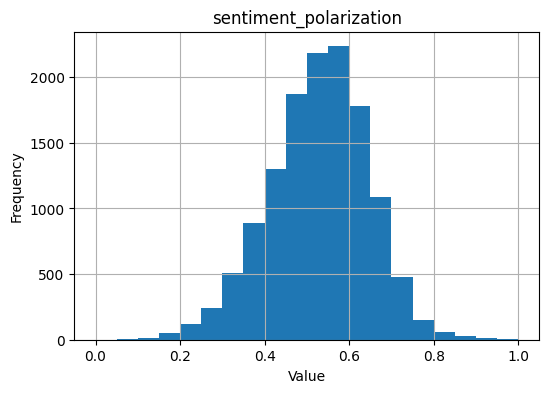

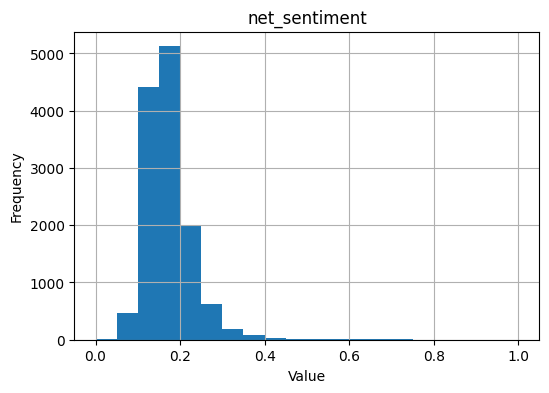

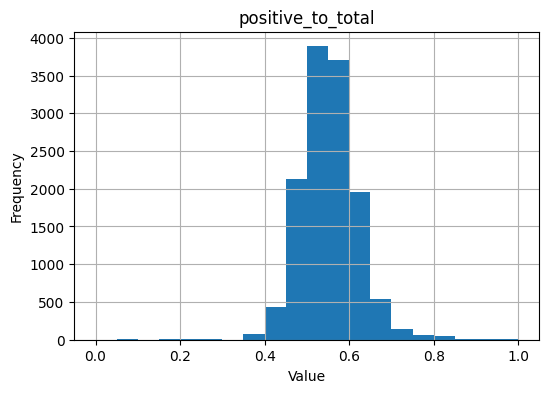

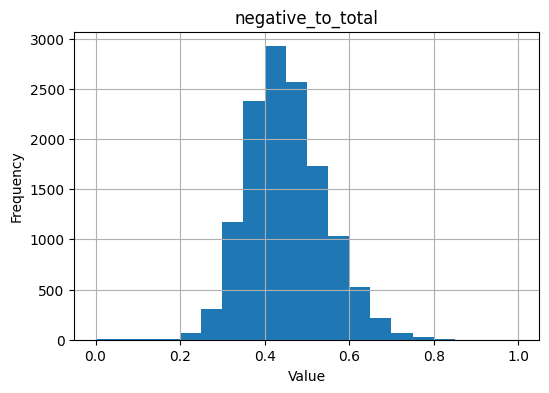

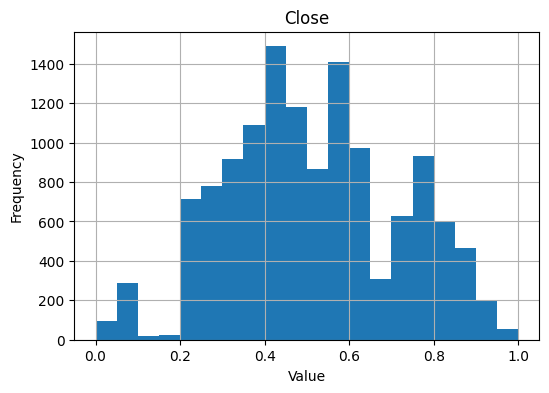

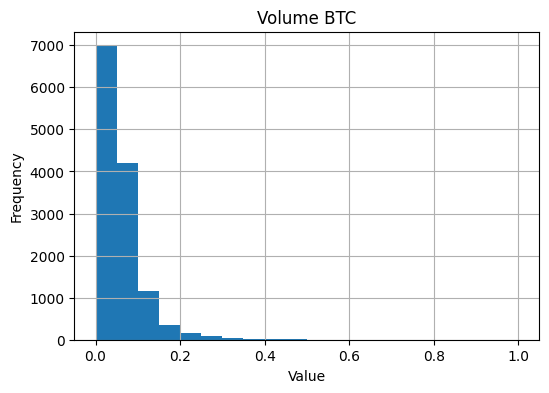

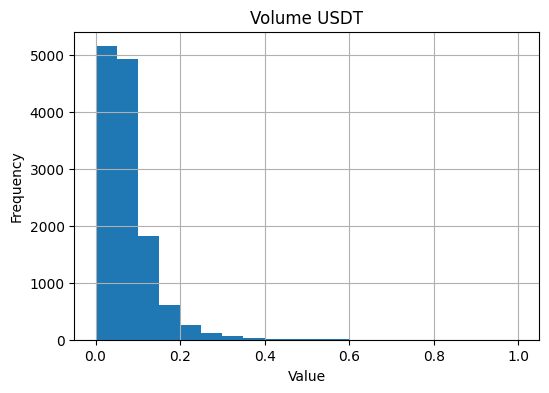

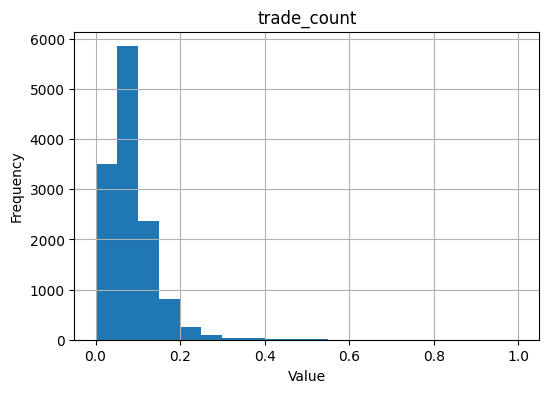

In [5]:
for column in data.columns:
    plt.figure(figsize=(6, 4))  # Adjust figsize as needed
    plt.hist(data[column], bins=20)  # Adjust number of bins as needed
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Box Plot

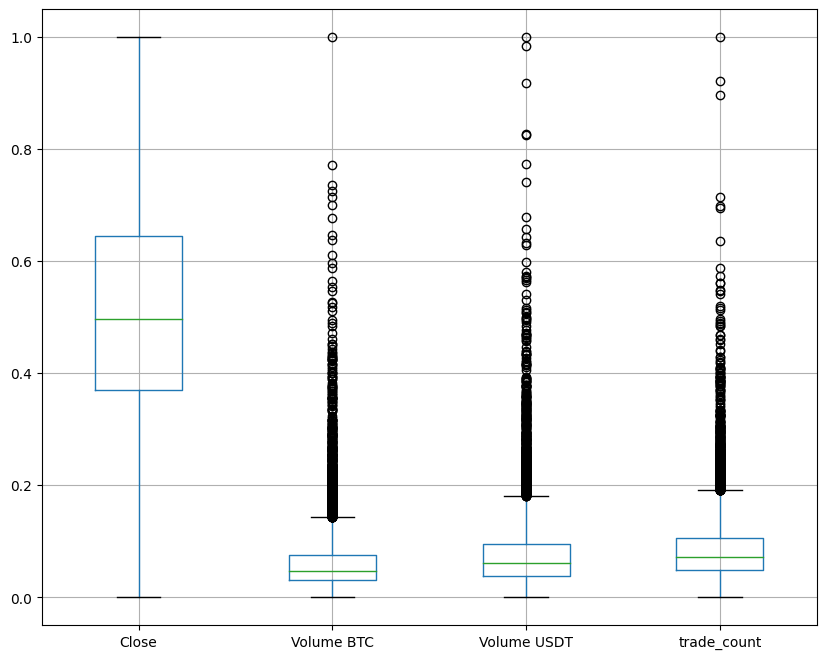

In [4]:
columns_to_plot = ['Close', 'Volume BTC', 'Volume USDT', 'trade_count']
data[columns_to_plot].boxplot(figsize=(10, 8), showfliers=True)  # Set showfliers to True to display data points
plt.show()

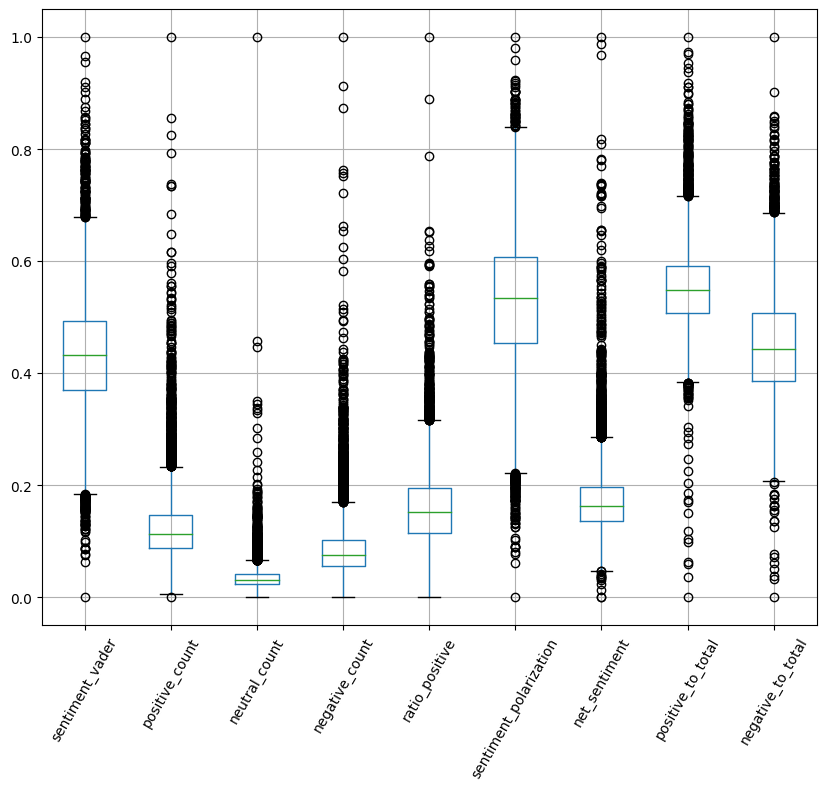

In [5]:
columns_to_plot = ['sentiment_vader', 'positive_count', 'neutral_count', 'negative_count', 'ratio_positive',
                   'sentiment_polarization', 'net_sentiment', 'positive_to_total', 'negative_to_total']
data[columns_to_plot].boxplot(figsize=(10, 8), showfliers=True)  # Set showfliers to True to display data points
plt.xticks(rotation=60)
plt.show()

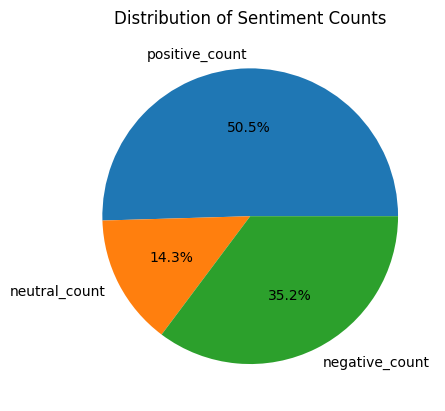

In [19]:
columns_to_plot = ['positive_count', 'neutral_count', 'negative_count']

# Get the sum of each column to use as values in the pie chart
values = data[columns_to_plot].sum()

plt.pie(values, labels=columns_to_plot, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Counts')
plt.show()

Line Graph

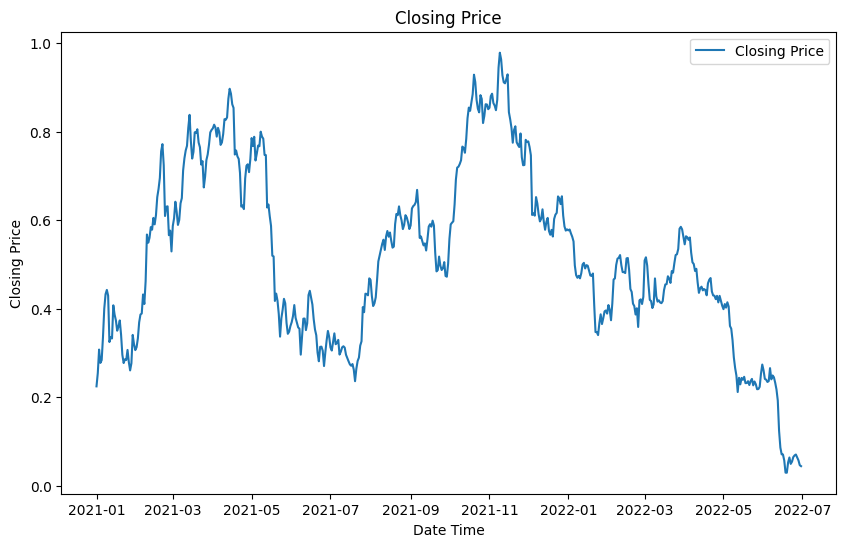

In [46]:
plt.figure(figsize=(10, 6)) 

daily_data = data.resample('D').mean()
plt.plot(daily_data.index, daily_data['Close'], label='Closing Price')

plt.xlabel("Date Time")  # add X-axis label
plt.ylabel("Closing Price")  # add Y-axis label
plt.title("Closing Price")  # add title
plt.legend()

plt.show()

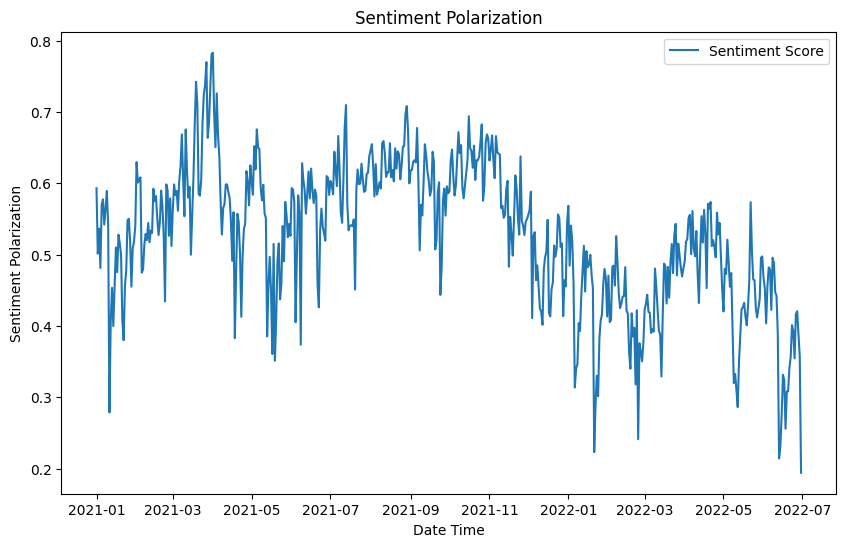

In [47]:
plt.figure(figsize=(10, 6)) 
plt.plot(daily_data.index, daily_data['sentiment_polarization'], label = 'Sentiment Score')

plt.xlabel("Date Time")  # add X-axis label
plt.ylabel("Sentiment Polarization")  # add Y-axis label
plt.title("Sentiment Polarization")  # add title
plt.legend()

plt.show()

In [4]:
data1 = data.loc['2021-01-01 02:00:00': '2021-06-01 00:00:00']
data2 = data.loc['2021-06-01 00:00:00': '2021-12-31 00:00:00']
data3 = data.loc['2021-12-31 00:00:00': '2022-06-30 00:00:00']


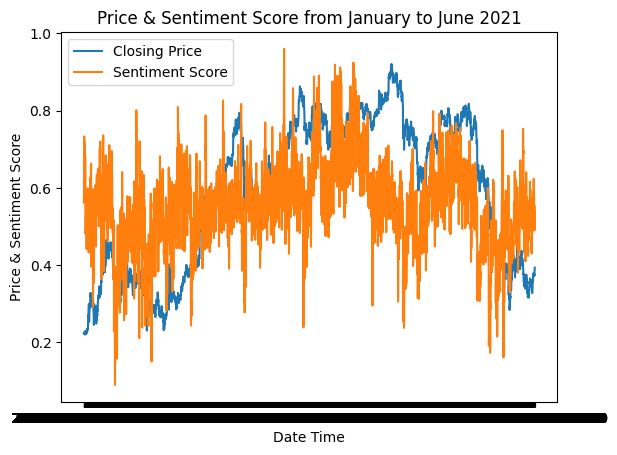

In [5]:
plt.plot(data1.index, data1['Close'], label = 'Closing Price')
plt.plot(data1.index, data1['sentiment_polarization'], label = 'Sentiment Score')
plt.xlabel("Date Time")  # add X-axis label
plt.ylabel("Price & Sentiment Score")  # add Y-axis label
plt.title("Price & Sentiment Score from January to June 2021")
plt.legend()
plt.show()

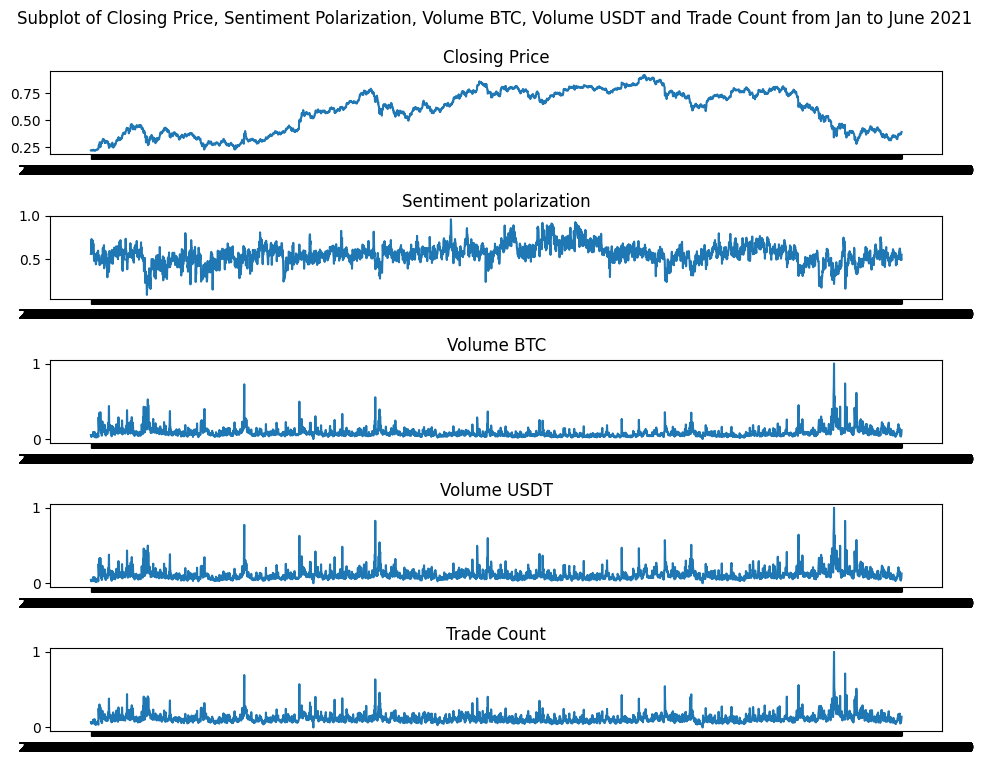

In [6]:
fig, axs = plt.subplots(5,1,figsize=(10,8))

#plt.subplot(4, 1, 1)
axs[0].plot(data1.index, data1['Close'])
axs[0].set_title("Closing Price")

#plt.subplot(4, 1, 2)
axs[1].plot(data1.index, data1['sentiment_polarization'])
axs[1].set_title("Sentiment polarization")

#plt.subplot(4, 1, 3)
axs[2].plot(data1.index, data1['Volume BTC'])
axs[2].set_title("Volume BTC")

#plt.subplot(4, 1, 4)
axs[3].plot(data1.index, data1['Volume USDT'])
axs[3].set_title("Volume USDT")

#plt.subplot(5, 1, 5)
axs[4].plot(data1.index, data1['trade_count'])
axs[4].set_title("Trade Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Subplot of Closing Price, Sentiment Polarization, Volume BTC, Volume USDT and Trade Count from Jan to June 2021")
plt.show()


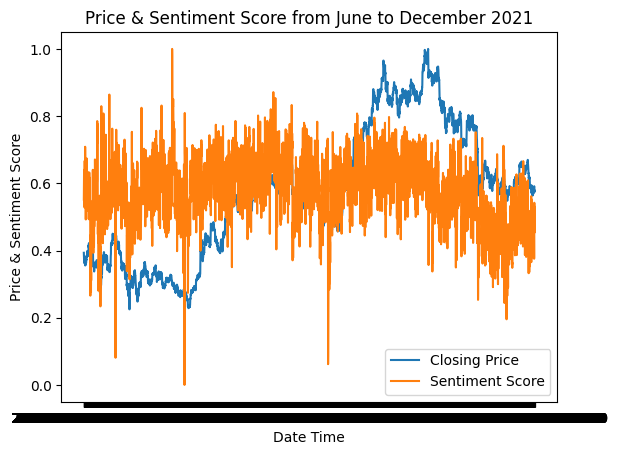

In [7]:
plt.plot(data2.index, data2['Close'], label = 'Closing Price')
plt.plot(data2.index, data2['sentiment_polarization'], label = 'Sentiment Score')
plt.xlabel("Date Time")  # add X-axis label
plt.ylabel("Price & Sentiment Score")  # add Y-axis label
plt.title("Price & Sentiment Score from June to December 2021")  # add title
plt.legend()
plt.show()

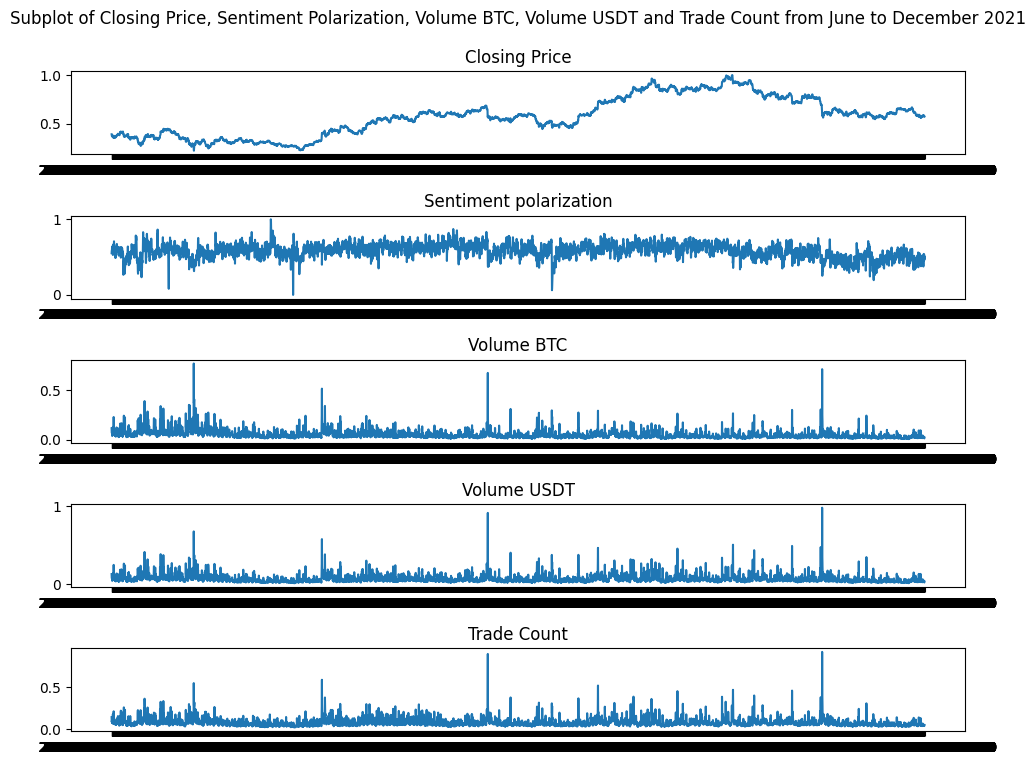

In [8]:
fig, axs = plt.subplots(5,1,figsize=(10,8))

#plt.subplot(4, 1, 1)
axs[0].plot(data2.index, data2['Close'])
axs[0].set_title("Closing Price")

#plt.subplot(4, 1, 2)
axs[1].plot(data2.index, data2['sentiment_polarization'])
axs[1].set_title("Sentiment polarization")

#plt.subplot(4, 1, 3)
axs[2].plot(data2.index, data2['Volume BTC'])
axs[2].set_title("Volume BTC")

#plt.subplot(4, 1, 4)
axs[3].plot(data2.index, data2['Volume USDT'])
axs[3].set_title("Volume USDT")

#plt.subplot(5, 1, 5)
axs[4].plot(data2.index, data2['trade_count'])
axs[4].set_title("Trade Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Subplot of Closing Price, Sentiment Polarization, Volume BTC, Volume USDT and Trade Count from June to December 2021")
plt.show()

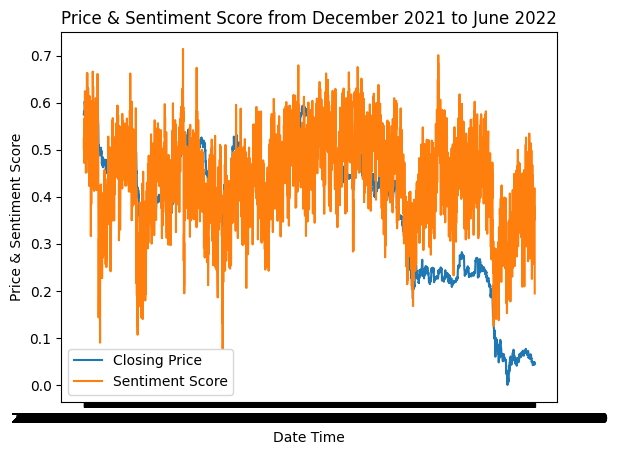

In [9]:
plt.plot(data3.index, data3['Close'], label = 'Closing Price')
plt.plot(data3.index, data3['sentiment_polarization'], label = 'Sentiment Score')
plt.xlabel("Date Time")  # add X-axis label
plt.ylabel("Price & Sentiment Score")  # add Y-axis label
plt.title("Price & Sentiment Score from December 2021 to June 2022")  # add title
plt.legend()
plt.show()

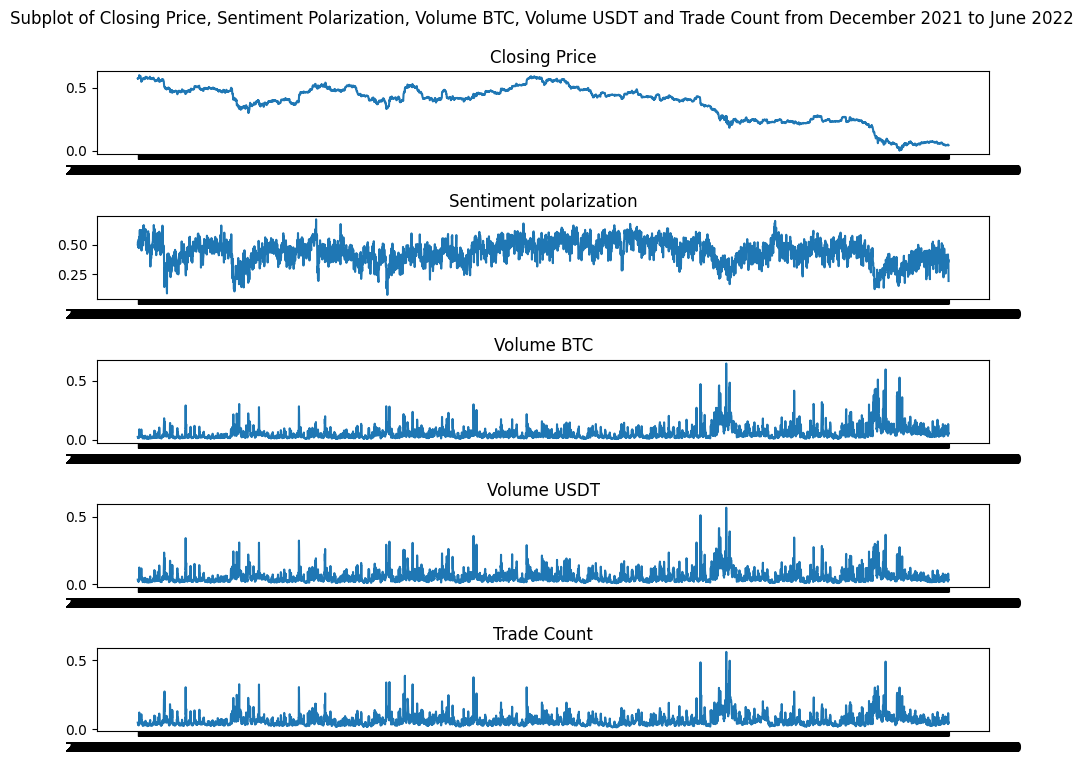

In [10]:
fig, axs = plt.subplots(5,1,figsize=(10,8))

#plt.subplot(4, 1, 1)
axs[0].plot(data3.index, data3['Close'])
axs[0].set_title("Closing Price")

#plt.subplot(4, 1, 2)
axs[1].plot(data3.index, data3['sentiment_polarization'])
axs[1].set_title("Sentiment polarization")

#plt.subplot(4, 1, 3)
axs[2].plot(data3.index, data3['Volume BTC'])
axs[2].set_title("Volume BTC")

#plt.subplot(4, 1, 4)
axs[3].plot(data3.index, data3['Volume USDT'])
axs[3].set_title("Volume USDT")

#plt.subplot(5, 1, 5)
axs[4].plot(data3.index, data3['trade_count'])
axs[4].set_title("Trade Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Subplot of Closing Price, Sentiment Polarization, Volume BTC, Volume USDT and Trade Count from December 2021 to June 2022")
plt.show()

## Lag Plot

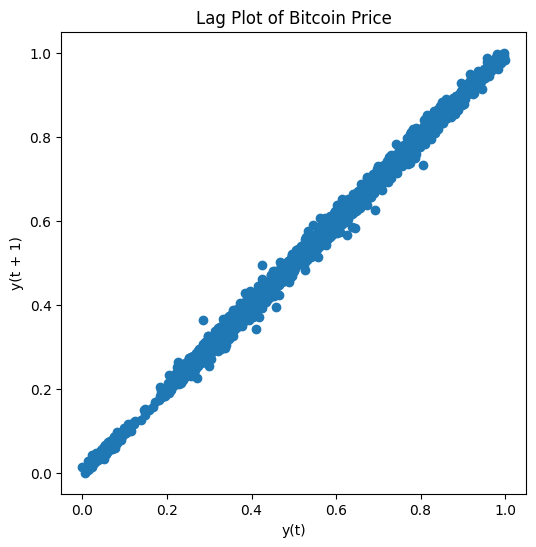

In [22]:
from pandas.plotting import lag_plot

plt.figure(figsize=(6, 6))
lag_plot(data['Close'])
plt.title('Lag Plot of Bitcoin Price')
plt.show()


In [11]:
plt.figure(figsize=(6, 6))
lag_plot(data['sentiment_polarization'])
plt.title('Lag Plot of Sentiment Polarization')
plt.show()

NameError: name 'lag_plot' is not defined

<Figure size 600x600 with 0 Axes>

## Autocorrelation and Partial Correlation Plot

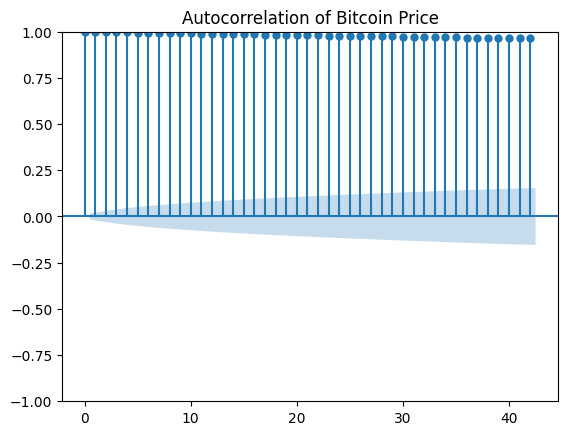

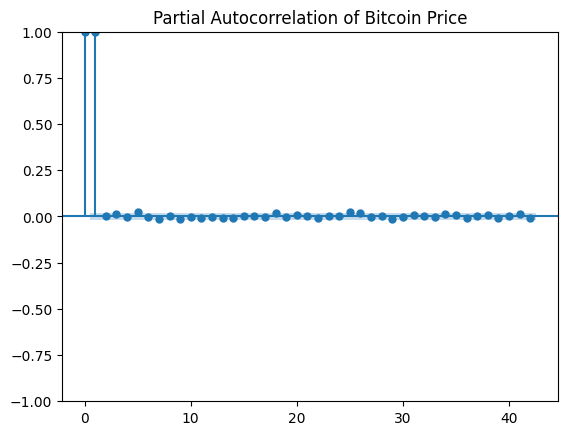

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(data['Close'])
plt.title('Autocorrelation of Bitcoin Price')
plt.show()

# Partial Autocorrelation plot
plot_pacf(data['Close'])
plt.title('Partial Autocorrelation of Bitcoin Price')
plt.show()


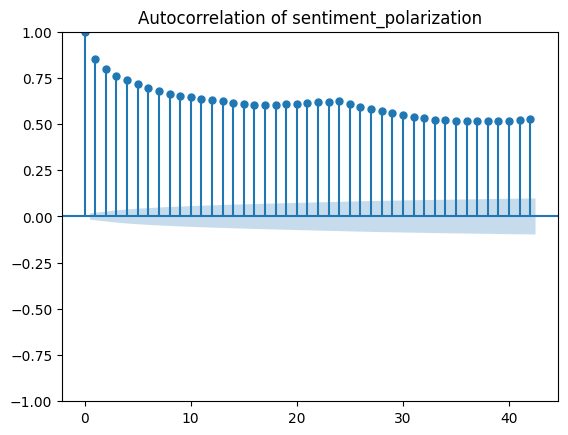

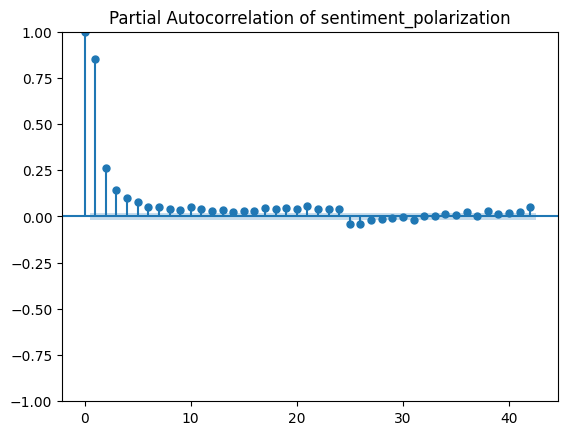

In [25]:
# Autocorrelation plot
plot_acf(data['sentiment_polarization'])
plt.title('Autocorrelation of sentiment_polarization')
plt.show()

# Partial Autocorrelation plot
plot_pacf(data['sentiment_polarization'])
plt.title('Partial Autocorrelation of sentiment_polarization')
plt.show()

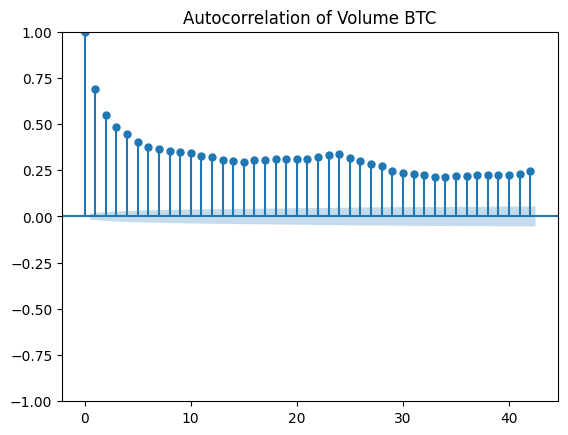

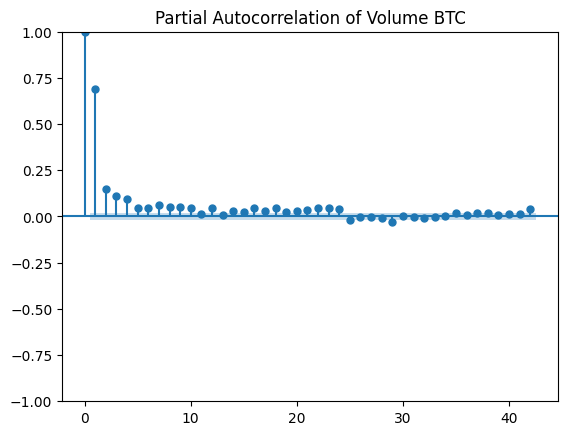

In [56]:
# Autocorrelation plot
plot_acf(data['Volume BTC'])
plt.title('Autocorrelation of Volume BTC')
plt.show()

# Partial Autocorrelation plot
plot_pacf(data['Volume BTC'])
plt.title('Partial Autocorrelation of Volume BTC')
plt.show()

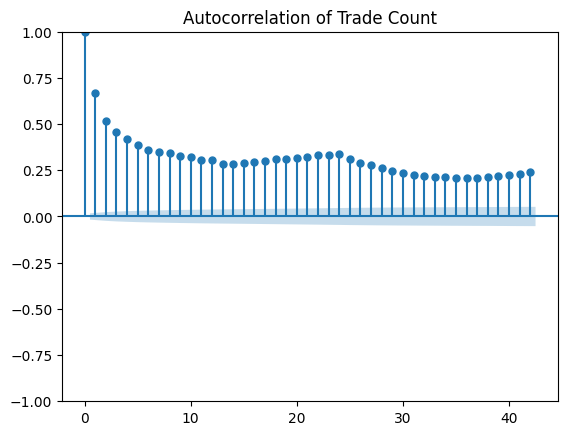

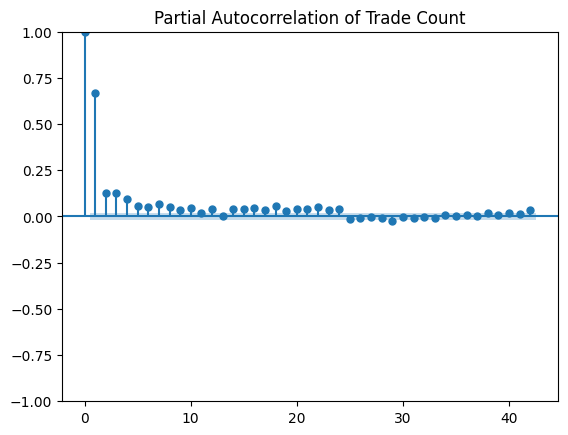

In [11]:
# Autocorrelation plot
plot_acf(data['trade_count'])
plt.title('Autocorrelation of Trade Count')
plt.show()

# Partial Autocorrelation plot
plot_pacf(data['trade_count'])
plt.title('Partial Autocorrelation of Trade Count')
plt.show()

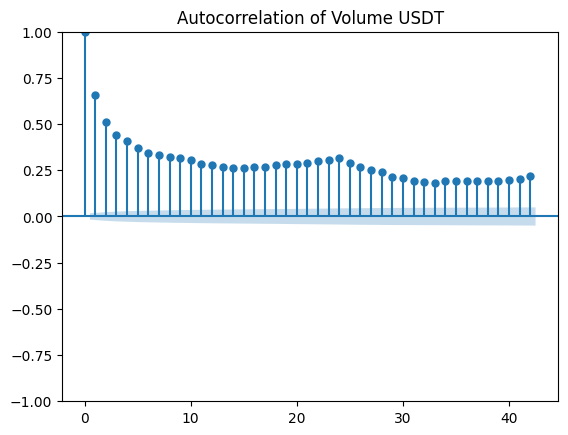

Text(0.5, 1.0, 'Partial Autocorrelation of Volume USDT')

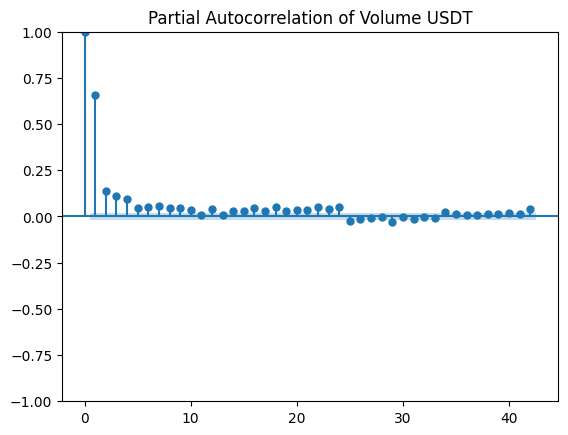

In [12]:
# Autocorrelation plot
plot_acf(data['Volume USDT'])
plt.title('Autocorrelation of Volume USDT')
plt.show()

# Partial Autocorrelation plot
plot_pacf(data['Volume USDT'])
plt.title('Partial Autocorrelation of Volume USDT')

## Augmented Dickey-Fuller (ADF) Test

In [6]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'bitcoin_prices' is a pandas Series of your time series data
bitcoin_prices = data['Close'].values

result = adfuller(bitcoin_prices)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -1.438841032630338
p-value: 0.5635201889979604
Critical Value (1%): -3.430853471064274
Critical Value (5%): -2.86176250990341
Critical Value (10%): -2.566888437089263
The time series is non-stationary.


In [10]:
# Assuming 'bitcoin_prices' is a pandas Series of your time series data
sentiment = data['sentiment_polarization'].values

result = adfuller(sentiment)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -6.1777165347604965
p-value: 6.568659981017332e-08
Critical Value (1%): -3.4308537037499787
Critical Value (5%): -2.8617626127305362
Critical Value (10%): -2.5668884918233754
The time series is stationary.


Correlation Heatmap

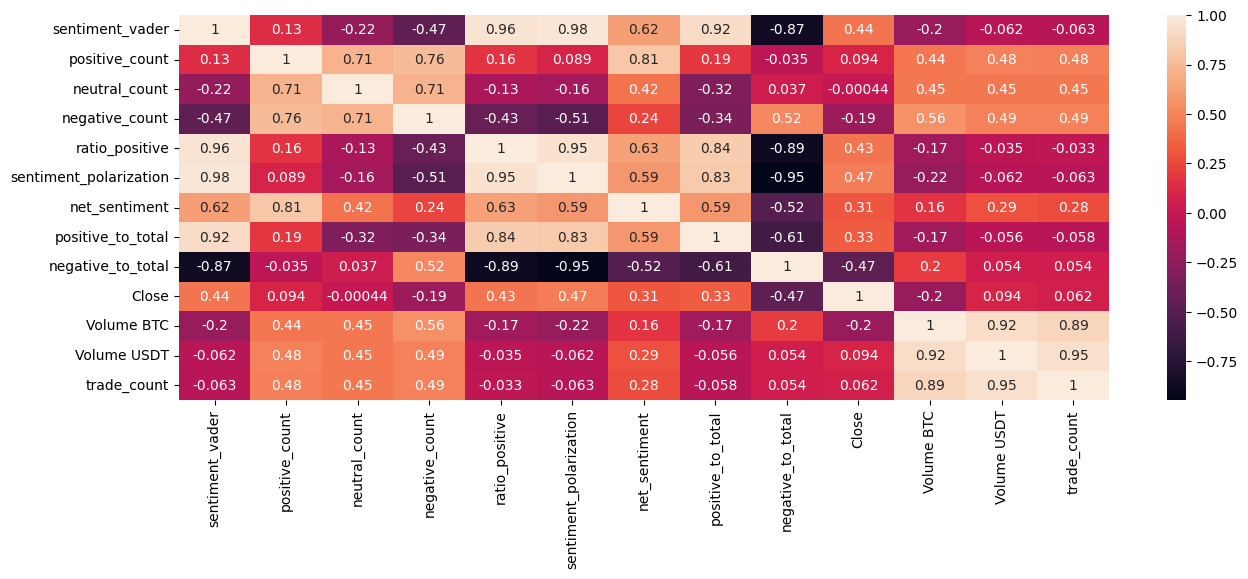

In [16]:
# checking correlation using heatmap
fig, ax = plt.subplots(figsize=(15, 5))

#plotting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)

In [14]:
data.keys()

Index(['sentiment_vader', 'positive_count', 'neutral_count', 'negative_count',
       'ratio_positive', 'sentiment_polarization', 'net_sentiment',
       'positive_to_total', 'negative_to_total', 'Close', 'Volume BTC',
       'Volume USDT', 'trade_count', 'sentiment_lag_1hr', 'sentiment_lag_2hr',
       'sentiment_lag_back_1hr', 'sentiment_lag_back_2hr'],
      dtype='object')

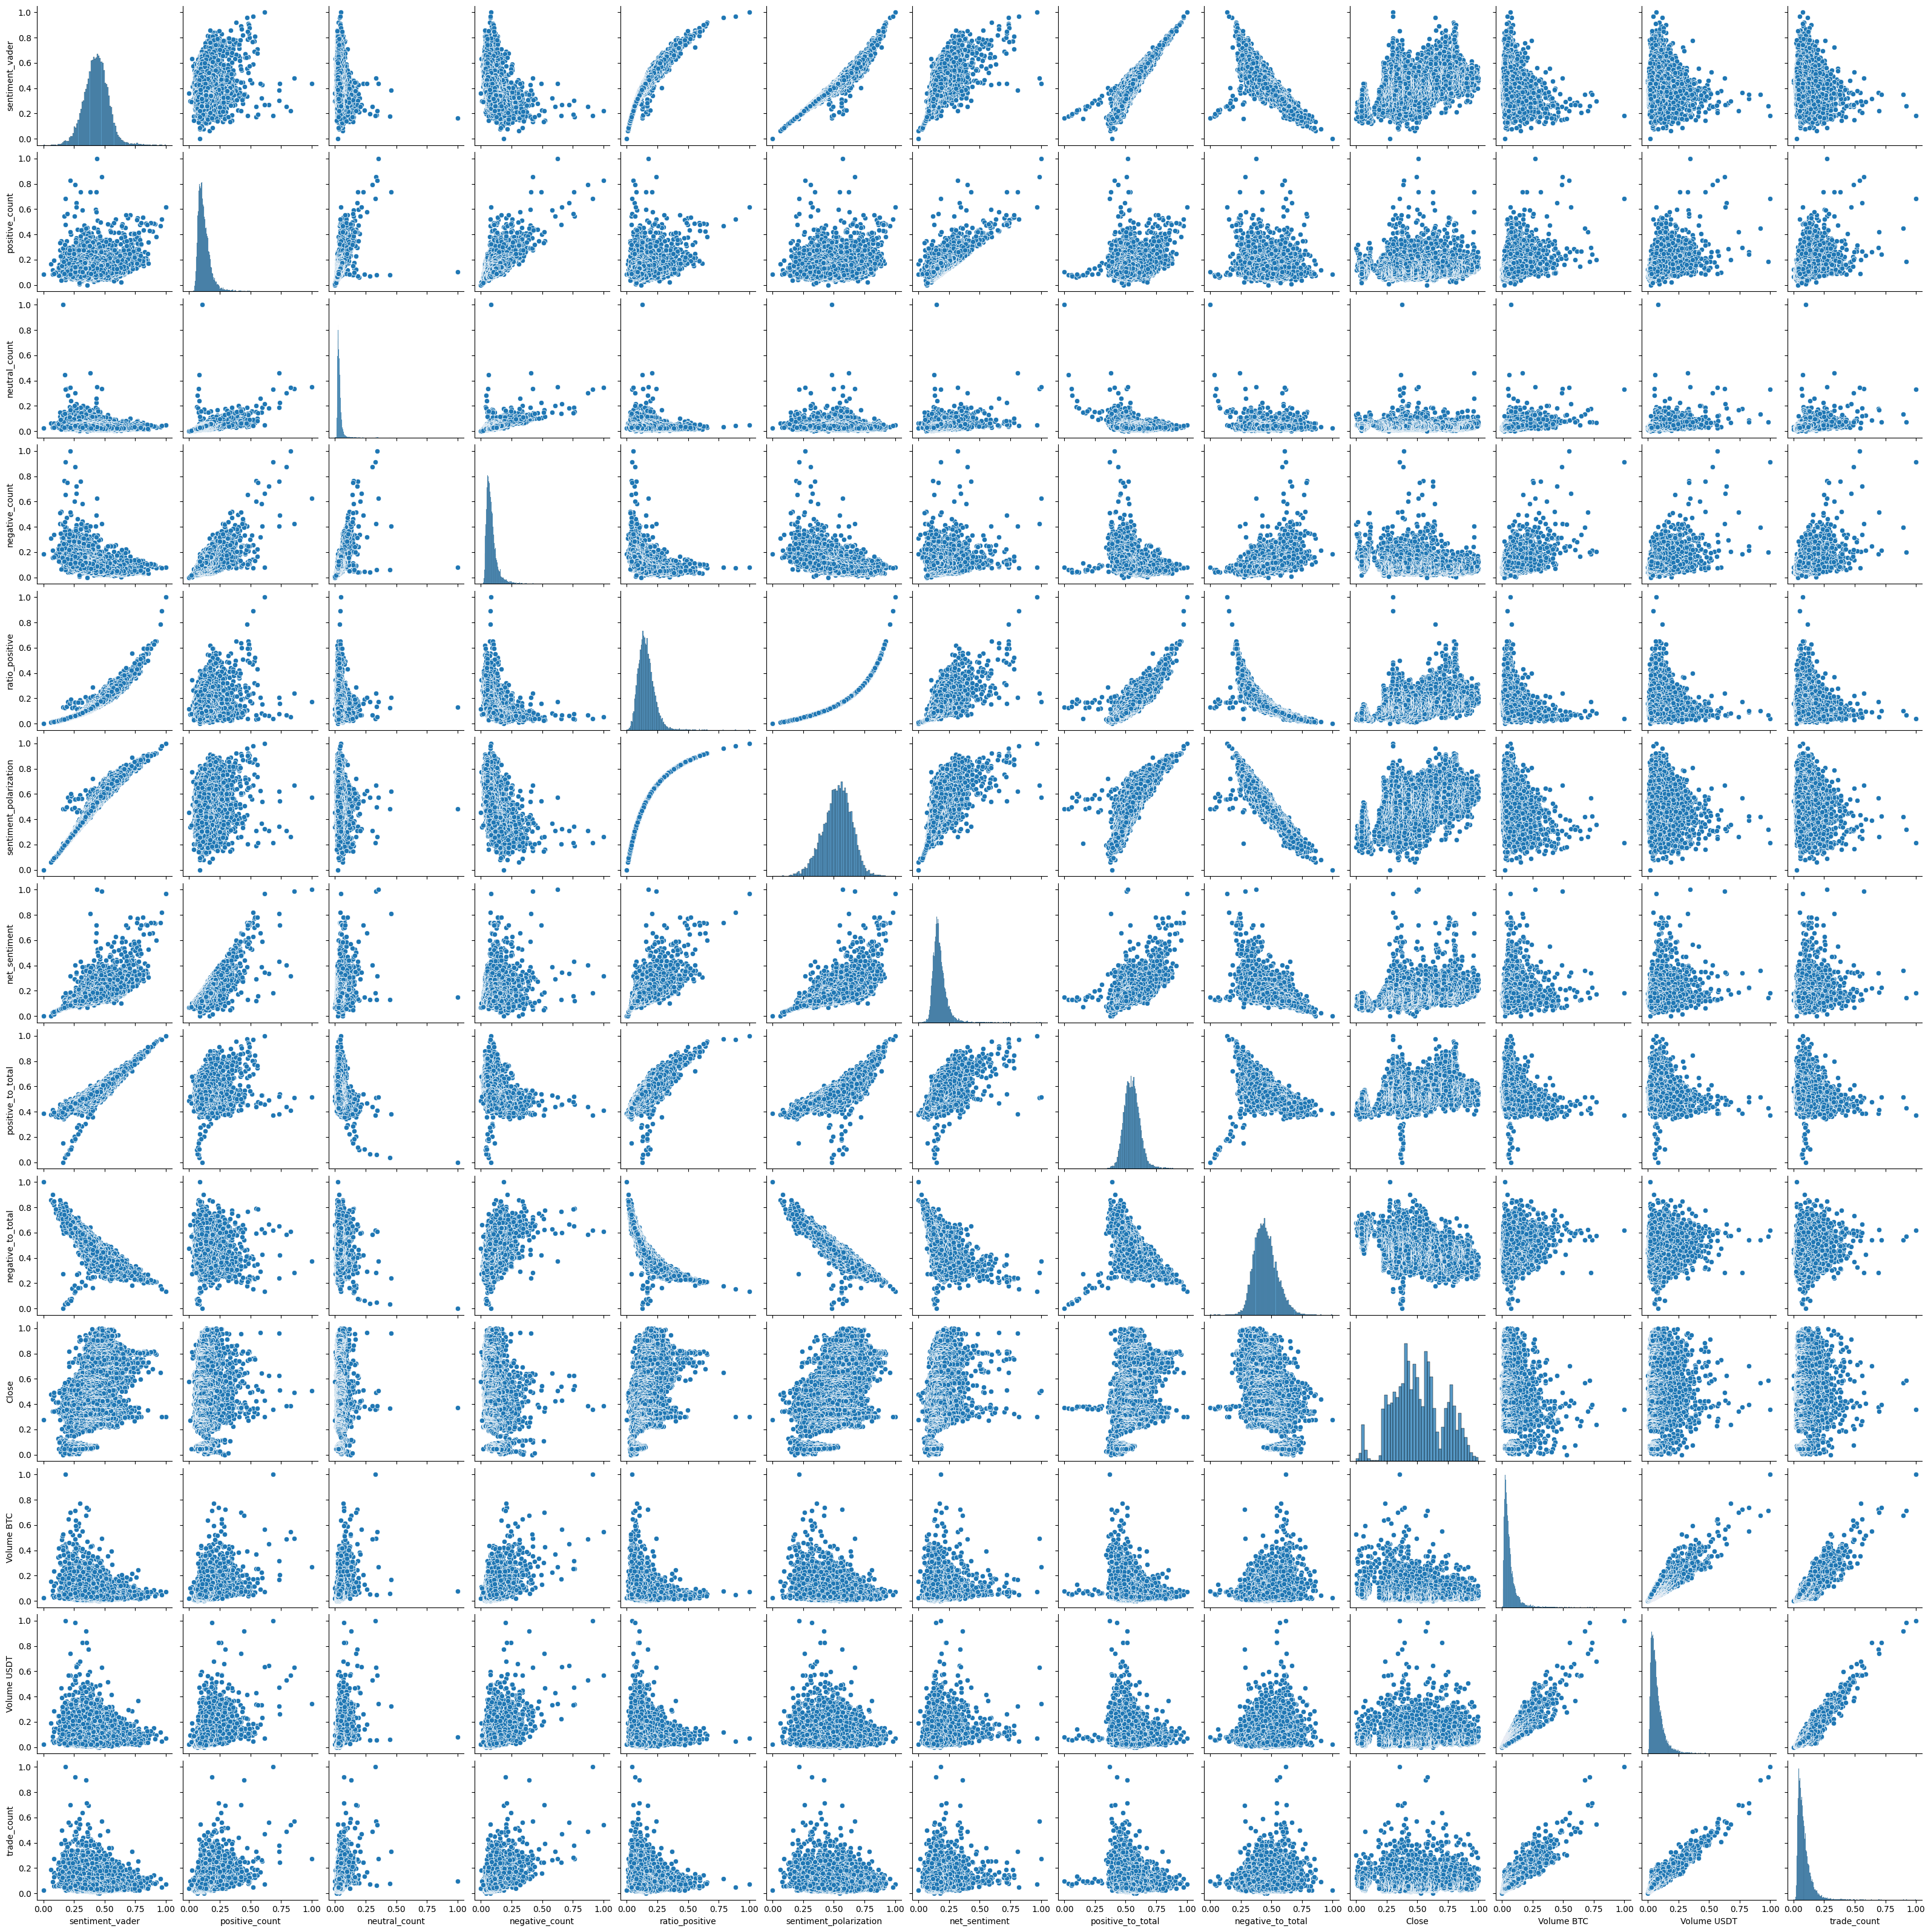

In [14]:
#data = data.drop(['Volume USDT', 'trade_count', ], axis=1)
sns.pairplot(data)